<a href="https://colab.research.google.com/github/Russo-Federico/ML-Projects/blob/main/SentimentAnalysis/NLP-sentiment-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Sentiment Analysis
sentiment analysis applied to the Twitter US Airline Sentiment (https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import kagglehub

plt.style.use("ggplot")

from google.colab import userdata

Environment setup

In [2]:
# retrieving kaggle secrets
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

Loading data

In [3]:
# Download latest version
path = kagglehub.dataset_download("crowdflower/twitter-airline-sentiment")

dataf = pd.read_csv(path + "/Tweets.csv")
dataf.head()

100%|██████████| 2.55M/2.55M [00:00<00:00, 46.9MB/s]

Extracting files...


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# df is a separate copy of the original dataframe having tweet_id as index
df = dataf.copy()
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
# col containing the text analysed
df['text'].values[0]

'@VirginAmerica What @dhepburn said.'

In [6]:
print(df.shape)

(14640, 15)


<Axes: title={'center': 'Distribution of sentiments'}, xlabel='airline_sentiment'>

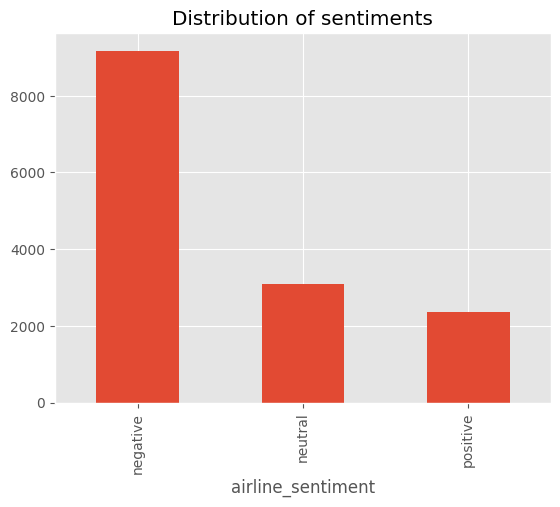

In [7]:
df['airline_sentiment'].value_counts().plot(kind='bar', title='Distribution of sentiments')

# NLTK

## NLTK basic operations

In [33]:
import random

rand_idx = random.randint(0, len(df) - 1)
print(rand_idx)

example = df['text'].values[rand_idx]
print(example)

5413
@SouthwestAir Cancelled Flightled my flight won't refund me and told me 2 call customer service n been holding for 30 minutes still waitin #BadService


In [9]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [34]:
tokens = nltk.word_tokenize(example)
print(tokens)

['@', 'SouthwestAir', 'Cancelled', 'Flightled', 'my', 'flight', 'wo', "n't", 'refund', 'me', 'and', 'told', 'me', '2', 'call', 'customer', 'service', 'n', 'been', 'holding', 'for', '30', 'minutes', 'still', 'waitin', '#', 'BadService']


In [35]:
# associate each token with the meaning of that part of text
tagged = nltk.pos_tag(tokens)
for tag in tagged:
  print(tag)

('@', 'JJ')
('SouthwestAir', 'NNP')
('Cancelled', 'NNP')
('Flightled', 'VBD')
('my', 'PRP$')
('flight', 'NN')
('wo', 'MD')
("n't", 'RB')
('refund', 'VB')
('me', 'PRP')
('and', 'CC')
('told', 'VBD')
('me', 'PRP')
('2', 'CD')
('call', 'JJ')
('customer', 'NN')
('service', 'NN')
('n', 'RB')
('been', 'VBN')
('holding', 'VBG')
('for', 'IN')
('30', 'CD')
('minutes', 'NNS')
('still', 'RB')
('waitin', 'VBP')
('#', '#')
('BadService', 'NNP')


In [36]:
# groups token into chunks of text
chunks = nltk.chunk.ne_chunk(tagged)
chunks.pprint()

(S
  @/JJ
  (ORGANIZATION SouthwestAir/NNP)
  Cancelled/NNP
  Flightled/VBD
  my/PRP$
  flight/NN
  wo/MD
  n't/RB
  refund/VB
  me/PRP
  and/CC
  told/VBD
  me/PRP
  2/CD
  call/JJ
  customer/NN
  service/NN
  n/RB
  been/VBN
  holding/VBG
  for/IN
  30/CD
  minutes/NNS
  still/RB
  waitin/VBP
  #/#
  (ORGANIZATION BadService/NNP))


## Sentiment Analysis using VADER
**(Valence Aware Dictionary and sEntiment Reasoner)**
<br><br>
Will use SentimentIntensityAnalyzer: takes the sentiment of each word (positive/negative/neutral) and computes the overall sentiment of the text
<br>
N.B. doesn't account for relations between words, very basic tool
<br><br>

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sia

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [14]:
# compound is from -1 to +1
# indicates how positive the text is overall

sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [15]:
sia.polarity_scores("This is so sad!")

{'neg': 0.588, 'neu': 0.412, 'pos': 0.0, 'compound': -0.6466}

In [16]:
# run polarity score on the text col of the dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['text']
  id = row['tweet_id']
  res[id] = sia.polarity_scores(text)

  0%|          | 0/14640 [00:00<?, ?it/s]

In [17]:
vaders = pd.DataFrame(res)
vaders

,570306133677760513,570301130888122368,570301083672813571,570301031407624196,570300817074462722,570300767074181121,570300616901320704,570300248553349120,570299953286942721,570295459631263746,...,569588473050611712,569588464896876545,569587813856841728,569587705937600512,569587691626622976,569587686496825344,569587371693355008,569587242672398336,569587188687634433,569587140490866689
neg,0.0,0.0,0.0,0.2460,0.3210,0.2560,0.0000,0.1600,0.3670,0.0000,...,0.0000,0.1210,0.2260,0.073,0.0,0.0000,0.2860,0.0000,0.0000,0.0000
neu,1.0,1.0,1.0,0.7540,0.6790,0.6700,0.6780,0.6430,0.4150,0.6420,...,0.4840,0.7810,0.7740,0.927,1.0,0.7830,0.7140,0.7230,0.8660,0.9520
pos,0.0,0.0,0.0,0.0000,0.0000,0.0740,0.3220,0.1970,0.2180,0.3580,...,0.5160,0.0980,0.0000,0.000,0.0,0.2170,0.0000,0.2770,0.1340,0.0480
compound,0.0,0.0,0.0,-0.5984,-0.5829,-0.5945,0.6908,0.1458,-0.3477,0.7717,...,0.4926,-0.1531,-0.5216,-0.128,0.0,0.3612,-0.7906,0.3182,0.5027,0.0772


In [18]:
# .T flips horizontally
vaders = pd.DataFrame(res).T

# reset_index moves the current index (tweet_id) into a col
# new index is a default int
# rename(columns={'index': 'tweet_id'}) renames the old index now col into tweet_id
vaders = vaders.reset_index().rename(columns={'index': 'tweet_id'})
vaders.head()

,tweet_id,neg,neu,pos,compound
0,570306133677760513,0.000,1.000,0.0,0.0000
1,570301130888122368,0.000,1.000,0.0,0.0000
2,570301083672813571,0.000,1.000,0.0,0.0000
3,570301031407624196,0.246,0.754,0.0,-0.5984
4,570300817074462722,0.321,0.679,0.0,-0.5829


In [19]:
# inner join in tweet_id col
merged = pd.merge(df, vaders, on='tweet_id', how='inner')

# set tweet_id as index
merged = merged.set_index('tweet_id')

merged.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,neg,neu,pos,compound
tweet_id,,,,,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0.000,1.000,0.0,0.0000
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0.000,1.000,0.0,0.0000
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0.000,1.000,0.0,0.0000
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0.246,0.754,0.0,-0.5984
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0.321,0.679,0.0,-0.5829


### Graphs


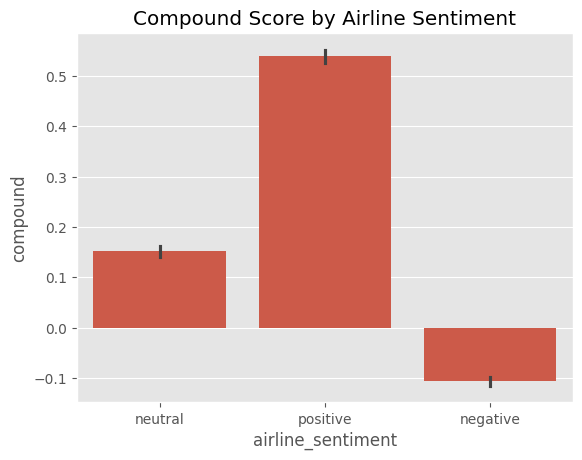

In [20]:
ax = sns.barplot(data=merged, x ='airline_sentiment', y='compound')
ax.set_title('Compound Score by Airline Sentiment')
plt.show()

The graph above indicates that the compound score appropriately reflects the sentiment label, it's therefor consistent with the airline_sentiment classification

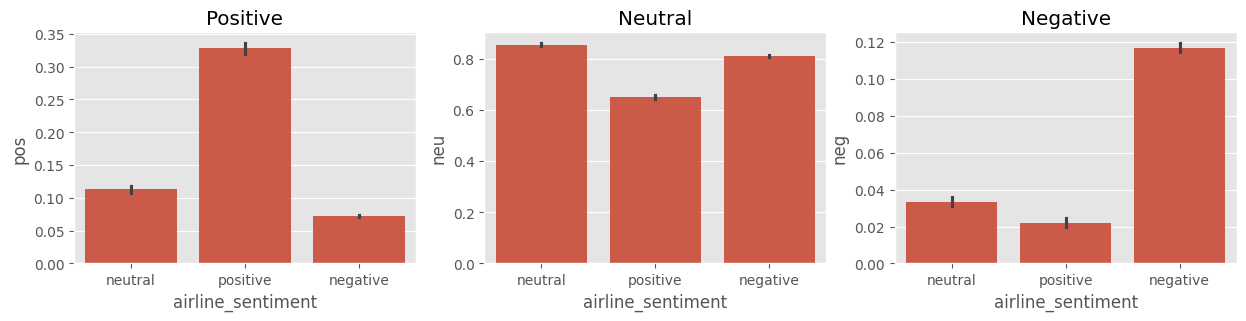

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15,3))
sns.barplot(data=merged, x='airline_sentiment', y='pos', ax=axs[0])
sns.barplot(data=merged, x='airline_sentiment', y='neu', ax=axs[1])
sns.barplot(data=merged, x='airline_sentiment', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

# Roberta Huggingface Pretrained model
<br>

*   Deep learning model trained on large amount of data
*   Accounts for context and relationships with other words



In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
# model trained on twitter comments
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
# load model weights
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [37]:
# VADER
print(example)
sia.polarity_scores(example)

@SouthwestAir Cancelled Flightled my flight won't refund me and told me 2 call customer service n been holding for 30 minutes still waitin #BadService


{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'compound': -0.25}

In [39]:
# roberta model
encoded_text = tokenizer(example, return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,  1039, 10050, 10823, 17906, 38013,  9970, 13275,  1329,   127,
          2524,   351,    75, 12173,   162,     8,   174,   162,   132,   486,
          2111,   544,   295,    57,  1826,    13,   389,   728,   202,  2067,
           179,   849, 26954, 32537,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [40]:
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 2.7375, -0.0681, -2.6269]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [41]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)  # to perform the multi-class classification
# we get the probability distribution over negative, neutral, and positive sentiment
scores

array([0.9388348 , 0.05677146, 0.00439383], dtype=float32)

In [42]:
scores_dict = {
    'roberta_negative': scores[0],
    'roberta_neutral': scores[1],
    'roberta_positive': scores[2]
}
scores_dict

{'roberta_negative': np.float32(0.9388348),
 'roberta_neutral': np.float32(0.056771465),
 'roberta_positive': np.float32(0.004393831)}

In [44]:
def polarity_scores_roberta(text):
  encoded_text = tokenizer(text, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_negative': scores[0],
    'roberta_neutral': scores[1],
    'roberta_positive': scores[2]
  }
  return scores_dict

In [59]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['text']
  id = row['tweet_id']
  # vader
  vader_result = sia.polarity_scores(text)
  vader_rename_result = {}
  for key, value in vader_result.items():
    vader_rename_result[f"vader_{key}"] = value
  # roberta
  roberta_result = polarity_scores_roberta(text)
  combined_res = {**vader_rename_result, **roberta_result}
  res[id] = combined_res

  0%|          | 0/14640 [00:00<?, ?it/s]

In [63]:
results = pd.DataFrame(res).T
results = results.reset_index().rename(columns={'index': 'tweet_id'})
results = pd.merge(df, results, on='tweet_id', how='inner')
results = results.set_index('tweet_id')
results.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,...,tweet_created,tweet_location,user_timezone,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive
tweet_id,,,,,,,,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,...,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0.000,1.000,0.0,0.0000,0.153647,0.800411,0.045942
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0.000,1.000,0.0,0.0000,0.829640,0.151273,0.019087
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0.000,1.000,0.0,0.0000,0.326381,0.542418,0.131201
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0.246,0.754,0.0,-0.5984,0.902390,0.090954,0.006657
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0.321,0.679,0.0,-0.5829,0.893211,0.095797,0.010992


# Compare Models

## Compare Models Scores

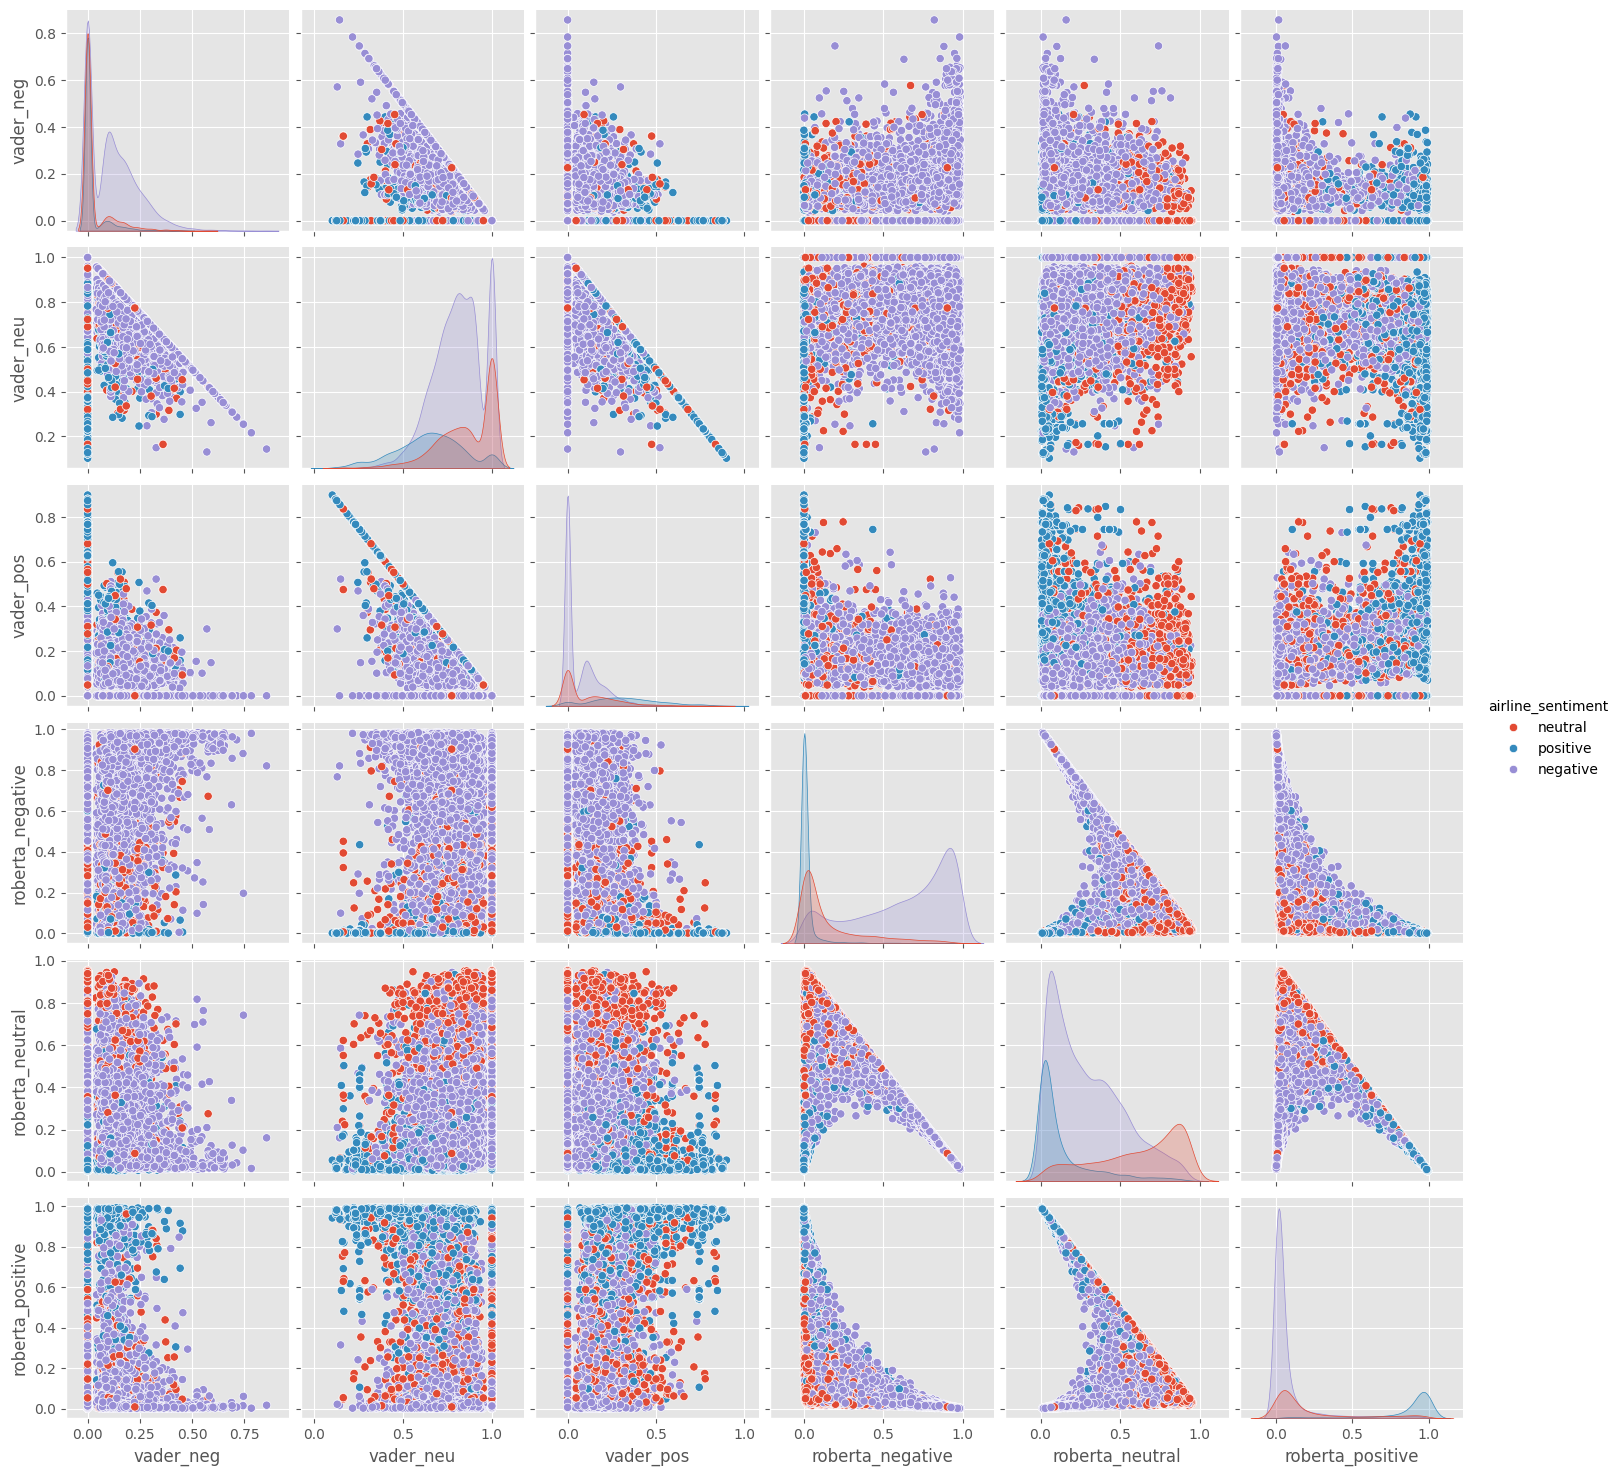

In [67]:
sns.pairplot(data=results,
              vars=['vader_neg',	'vader_neu',	'vader_pos',
	                'roberta_negative',	'roberta_neutral',	'roberta_positive'],
              hue='airline_sentiment')

## Compare examples

In [79]:
# negative by dataset, inferred as positive by the roberta model
results.query('airline_sentiment == "negative"').sort_values('roberta_positive', ascending=False)['text'].values[0]

'@united What a really GREAT &amp; FLATTERING story about you! You should be very proud :) http://t.co/oKtUkjY92O (via @ParachuteGuy)'

*'@united What a really GREAT &amp; FLATTERING story about you! You should be very proud :) http://t.co/oKtUkjY92O (via @ParachuteGuy)'*
<br><br>
this is a negative review, the model didn't understand the sarcasm in the comment (probably the analysing the picture would have helped on that)

In [78]:
# negative by dataset, inferred as positive by the vader model
results.query('airline_sentiment == "negative"').sort_values('vader_pos', ascending=False)['text'].values[1]

'@USAirways I better get a free flight'

*'@USAirways I better get a free flight'*
<br><br>
model didn't get the implications of a person commenting like this

In [75]:
# positive by dataset, inferred as negative by the roberta model
results.query('airline_sentiment == "positive"').sort_values('roberta_negative', ascending=False)['text'].values[0]

'@SouthwestAir What can we do to bring you back to Jackson, MS?! We miss you terribly around here. These other airlines are horrible!!'

*'@SouthwestAir What can we do to bring you back to Jackson, MS?! We miss you terribly around here. These other airlines are horrible!!'*

positive review for southest airlines, negative towards all the other companies, the model cought that negative sentiment
<br>wether the review is positive or not is a metter of from where you look at it

In [84]:
# negative by dataset, inferred as positive by the vader model
results.query('airline_sentiment == "positive"').sort_values('vader_neg', ascending=False)['text'].values[4]

'@SouthwestAir Oh no worries NL, no disappointments here. Better to have NO lounges than like #Delta who has them but does disappoint!'

*'@SouthwestAir Oh no worries NL, no disappointments here. Better to have NO lounges than like #Delta who has them but does disappoint!'*

same as above, general sentiment is negative while the review itself is positive if you look at it as a southwest review

# Pipeline
use huggingface transformers pipeline

In [85]:
from transformers import pipeline

In [87]:
sentiment_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [88]:
sentiment_pipeline("This is the coolest thing ever!")

[{'label': 'POSITIVE', 'score': 0.9998607635498047}]

In [89]:
sentiment_pipeline("This is a scam :/ ")

[{'label': 'NEGATIVE', 'score': 0.999640703201294}]

In [94]:
sentiment_pipeline("I can't write a neutral sentence")

[{'label': 'NEGATIVE', 'score': 0.9948517680168152}]